# Non-linear Model Example from SciPy Docs

The following example is the one given in the docs for [`scipy.optimize.curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).
This example will perform a non-linear least squares fit of a model, $f$, to observations.

In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

np.random.seed(0)

First define the non-linear model as exponential decay with a constant term

$$
f (x | \,\vec{\theta}) = a \cdot e^{-b x} + c
$$

In [2]:
def model(x, a, b, c):
    return a * np.exp(-b * x) + c

Now generate pseudodata from the model with a Normal noise term added

In [3]:
x = np.linspace(0, 4, 50)
true_parameters = [2.5, 1.3, 0.5]
observations = model(x, *true_parameters)
noise = 0.2 * np.random.normal(size=x.size)
data = observations + noise

before we do anything else, visualize the pseudodata

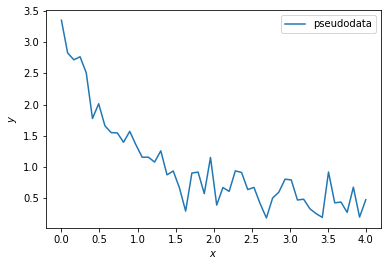

In [4]:
fig, ax = plt.subplots()
ax.plot(x, data, label="pseudodata")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.legend()

Now perform statistical inference on the model parameters $a$, $b$, and $c$ by performing an unconstrained least-squares fit of the model to the pseudodata

In [5]:
pars_bestfit, pars_covariance = curve_fit(model, x, data)

print("Best fit model parameters:")
for name, par in zip(["a", "b", "c"], pars_bestfit):
    print(f"{name}: {par:0.5f}")

Best fit model parameters:
a: 2.80721
b: 1.24568
c: 0.44517


and plot the best fit model next to the pseudodata

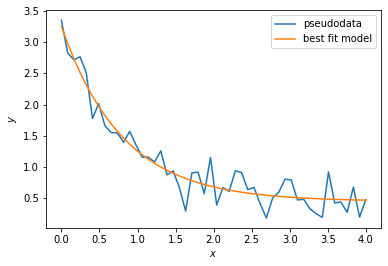

In [6]:
model_predictions = model(x, *pars_bestfit)

fig, ax = plt.subplots()
ax.plot(x, data, label="pseudodata")
ax.plot(x, model_predictions, label="best fit model")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.legend()

Additionally, constrain the model to have positive parameters with uppper bounds

In [7]:
lower_bounds = [0, 0, 0]
upper_bounds = [3.0, 1.0, 0.5]

and perform statistical inference on the model parameters by performing an constrained least-squares fit of the model to the pseudodata

In [8]:
pars_constrained, pars_covariance_constrained = curve_fit(
    model, x, data, bounds=(lower_bounds, upper_bounds)
)

print("Best fit model parameters for constrained model:")
for name, par in zip(["a", "b", "c"], pars_constrained):
    print(f"{name}: {par:0.5f}")

Best fit model parameters for constrained model:
a: 2.72785
b: 1.00000
c: 0.33802


and plot the constrained model next to the unconstrained model

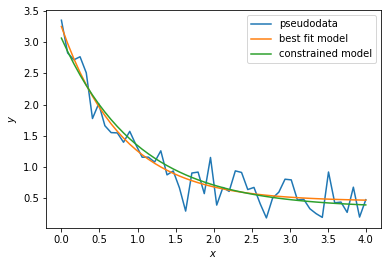

In [9]:
unconstrained_model = model(x, *pars_bestfit)
constrained_model = model(x, *pars_constrained)

fig, ax = plt.subplots()
ax.plot(x, data, label="pseudodata")
ax.plot(x, unconstrained_model, label="best fit model")
ax.plot(x, constrained_model, label="constrained model")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.legend()